In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import re
import copy
import adtk
from adtk.data import validate_series
from adtk.visualization import plot
from IPython.display import display
from ydata_profiling import ProfileReport

pd.options.mode.chained_assignment = None

In [9]:
data_cleaned_dir = "../data/aruba/data_cleaned.csv"

df_aruba = pd.read_csv(
    data_cleaned_dir,
    delimiter=",",
    header=0,
    names=[
        "date",
        "time",
        "sensor_type",
        "sensor_status",
        "datetime",
    ],
)

df_aruba["datetime"] = pd.to_datetime(df_aruba["datetime"])
# display(df_aruba)
# print(df_aruba.info())
# df_aruba.dtypes

In [10]:
generate_sensor_list = lambda n, m: [f"M{str(i).zfill(3)}" for i in range(n, m + 1)]
motion_sensor_list = generate_sensor_list(1, 31)

filter_sensor_group = {
    "all": motion_sensor_list,
    "bedroom": ["M001", "M002", "M003", "M004", "M005", "M006", "M007"],
    "bedroom_in_bed": ["M002", "M003"],
    "bedroom_out_of_bed": ["M001", "M004", "M005", "M006", "M007"],
}

In [11]:
def create_data_subset(df: pd.DataFrame, pattern: str) -> pd.DataFrame:
    df_subset = df[df["sensor_type"].str.match(pattern)]
    df_subset.loc[:, "date"] = pd.to_datetime(df_subset["date"])
    df_subset.loc[:, "datetime"] = pd.to_datetime(df_subset["datetime"], format="ISO8601")
    return df_subset


# Regex pattern for motion sensors (e.g., M001, M002, etc.)
pattern_motion_sensor = r"[M]{1}[0-9]{3,}"
pattern_temperature_sensor = r"[T]{1}[0-9]{3,}"
pattern_door_closure_sensor = r"[D]{1}[0-9]{3,}"

In [12]:
# Create a subset for motion sensors
df_motion_sensor = create_data_subset(df_aruba, pattern_motion_sensor)
df_motion_sensor = df_motion_sensor.reset_index(drop=True)

df_motion_sensor.loc[:, "date"] = pd.to_datetime(df_motion_sensor["datetime"]).dt.date
df_motion_sensor.loc[:, "time"] = (
    pd.to_datetime(df_motion_sensor["datetime"], format="%H:%M:%S.%f").dt.floor("s").dt.time
)

df_bedroom = df_motion_sensor.loc[df_motion_sensor["sensor_type"].isin(filter_sensor_group["bedroom"])]

In [13]:
df_bedroom_train = df_bedroom[["datetime", "sensor_type", "sensor_status"]]
df_bedroom_train["datetime"] = pd.to_datetime(df_bedroom_train["datetime"])  # Ensure it's a datetime object
df_bedroom_train.set_index("datetime", inplace=True)  # Set 'datetime' as the index
bedroom_train = validate_series(df_bedroom_train)

array([<Axes: >, <Axes: >], dtype=object)

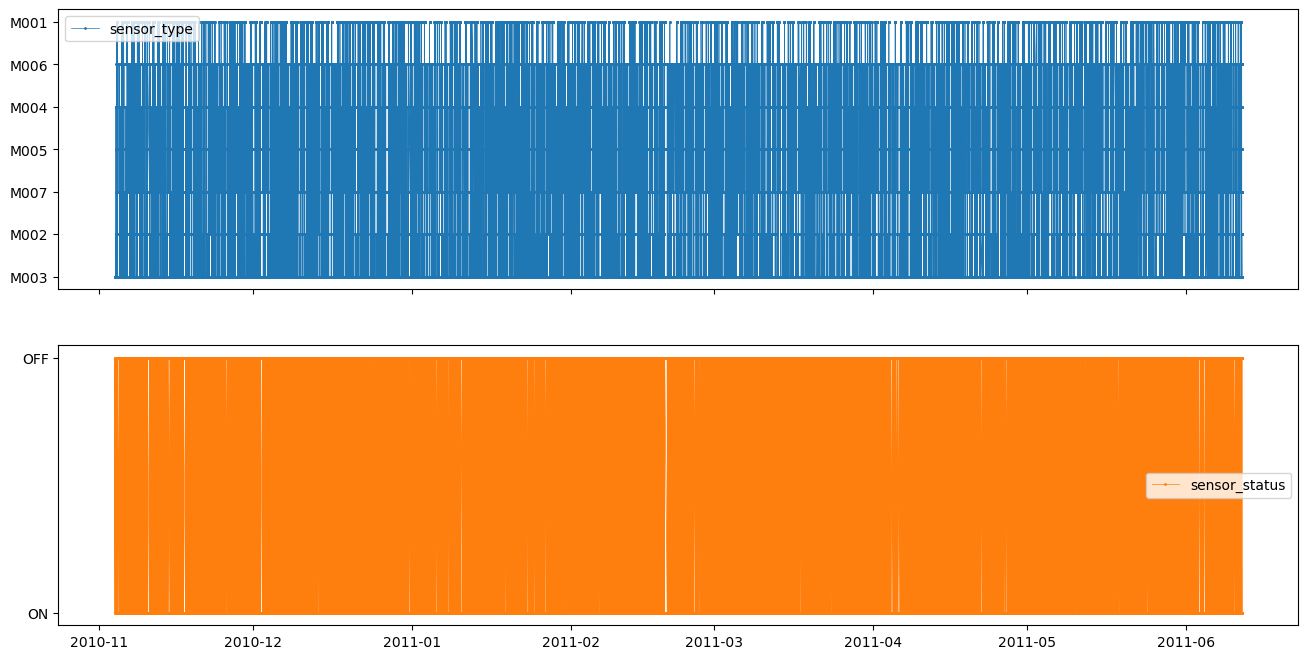

In [14]:
# /opt/conda/lib/python3/site-package/adtk
# python -m compileall .

# Example plot
plot(bedroom_train)